In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

# CorInfoMax

# CSM

In [2]:
df_results = pd.read_pickle(r"../Results/simulation_results_CSM_MNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [3]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9646833333333333, 0.9785166666666667, 0.981...","[0.9592, 0.9714, 0.9705, 0.9747, 0.9774, 0.976...",0.999967,0.9814
1,1,10,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9670166666666666, 0.97375, 0.98336666666666...","[0.9618, 0.9654, 0.9745, 0.9742, 0.9722, 0.972...",0.999850,0.9772
2,1,20,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9669833333333333, 0.9730833333333333, 0.979...","[0.9631, 0.9662, 0.9698, 0.9755, 0.9755, 0.973...",0.999883,0.9767
3,1,30,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9659833333333333, 0.9788333333333333, 0.981...","[0.962, 0.9703, 0.9724, 0.9754, 0.9757, 0.9731...",1.000000,0.9802
4,1,40,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9658, 0.97855, 0.981, 0.9852833333333333, 0...","[0.9599, 0.9713, 0.9715, 0.9735, 0.9788, 0.976...",0.999983,0.9784
5,1,50,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9687333333333333, 0.97565, 0.98313333333333...","[0.965, 0.966, 0.9726, 0.9727, 0.9768, 0.976, ...",0.997100,0.9750
6,1,60,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9622833333333334, 0.9785, 0.981633333333333...","[0.9557, 0.9694, 0.9704, 0.9752, 0.9772, 0.975...",0.999833,0.9783
7,1,70,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.96395, 0.9721333333333333, 0.98156666666666...","[0.9598, 0.9643, 0.9724, 0.9658, 0.972, 0.9763...",0.098717,0.0980
8,1,80,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.9628333333333333, 0.9753333333333334, 0.979...","[0.9565, 0.9694, 0.9689, 0.9737, 0.9735, 0.969...",0.999983,0.9821
9,1,90,CSM,"{'alphas_W': [0.5, 0.375], 'alphas_M': [-0.01]...","[0.96505, 0.9754333333333334, 0.98311666666666...","[0.9607, 0.9672, 0.9738, 0.9728, 0.9694, 0.974...",0.999600,0.9792


In [4]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.909492,0.89065


In [5]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


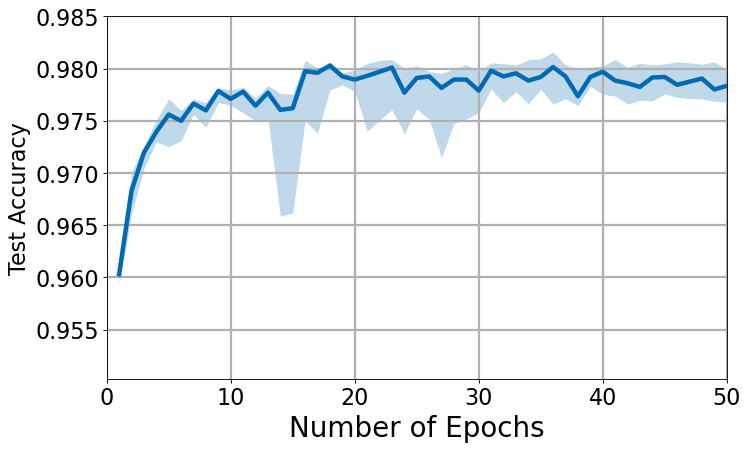

In [6]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# EP

In [7]:
df_results = pd.read_pickle(r"../Results/simulation_results_EP_MNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [8]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9564333333333334, 0.9715833333333334, 0.981...","[0.9511, 0.9621, 0.9701, 0.9716, 0.9732, 0.973...",0.999800,0.9752
1,1,10,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9576, 0.9675166666666667, 0.9777, 0.9851333...","[0.9522, 0.9592, 0.9664, 0.9719, 0.972, 0.9728...",1.000000,0.9757
2,1,20,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9533166666666667, 0.9724666666666667, 0.979...","[0.9455, 0.965, 0.9699, 0.9738, 0.9729, 0.9747...",0.999983,0.9776
3,1,30,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9569166666666666, 0.9715833333333334, 0.981...","[0.9523, 0.9629, 0.9696, 0.9687, 0.9691, 0.973...",0.999567,0.9752
4,1,40,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9607666666666667, 0.9740333333333333, 0.979...","[0.9556, 0.9642, 0.9669, 0.9707, 0.9705, 0.973...",0.999967,0.9769
5,1,50,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9577166666666667, 0.9735, 0.978116666666666...","[0.9523, 0.9633, 0.967, 0.9731, 0.9721, 0.9733...",0.999800,0.9756
6,1,60,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.95725, 0.9740333333333333, 0.97928333333333...","[0.9498, 0.9657, 0.9693, 0.9689, 0.9716, 0.974...",1.000000,0.9760
7,1,70,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.95965, 0.97405, 0.97685, 0.9853833333333334...","[0.9548, 0.9651, 0.9636, 0.9739, 0.9711, 0.966...",1.000000,0.9760
8,1,80,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9557, 0.9743833333333334, 0.980483333333333...","[0.9506, 0.965, 0.9691, 0.9693, 0.9746, 0.9726...",0.999983,0.9771
9,1,90,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.9597166666666667, 0.97105, 0.97921666666666...","[0.9572, 0.964, 0.9695, 0.9698, 0.9721, 0.9736...",0.999983,0.9763


In [9]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.999908,0.97616


In [10]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

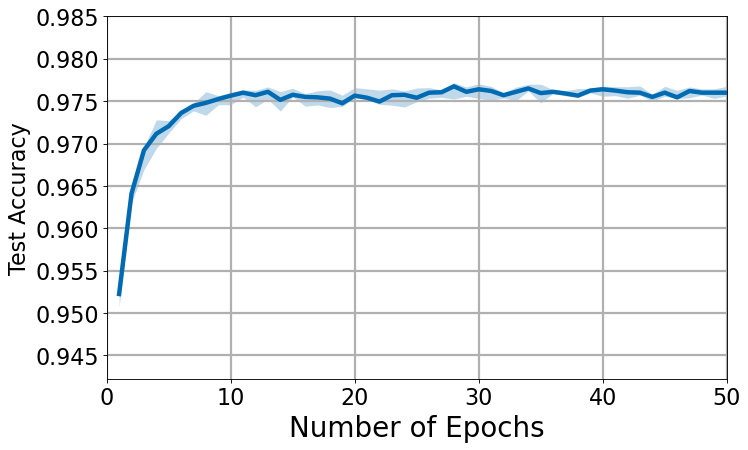

In [11]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# EP-Continual-Weight-Update

# PC

In [12]:
df_results = pd.read_pickle(r"../Results/simulation_results_PC_MNIST_V2.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [13]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9514666666666667, 0.9693666666666667, 0.977...","[0.9495, 0.9644, 0.9713, 0.9738, 0.978, 0.9782...",0.994017,0.9746
1,1,10,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.95155, 0.9704666666666667, 0.97816666666666...","[0.9503, 0.9657, 0.972, 0.9742, 0.977, 0.9793,...",0.990900,0.9704
2,1,20,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9479833333333333, 0.9684333333333334, 0.976...","[0.947, 0.9641, 0.9702, 0.9748, 0.9762, 0.9788...",0.998450,0.9771
3,1,30,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9534666666666667, 0.96865, 0.9797, 0.983916...","[0.951, 0.9639, 0.9734, 0.9744, 0.9759, 0.9784...",0.997100,0.9761
4,1,40,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9516833333333333, 0.9697166666666667, 0.978...","[0.951, 0.9632, 0.9715, 0.9756, 0.9656, 0.9707...",0.986417,0.9647
5,1,50,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9529, 0.97025, 0.9780833333333333, 0.983733...","[0.9528, 0.9658, 0.9706, 0.9751, 0.9763, 0.978...",0.996367,0.9779
6,1,60,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9499333333333333, 0.9703166666666667, 0.976...","[0.9487, 0.9642, 0.9692, 0.9757, 0.9764, 0.977...",0.998900,0.9773
7,1,70,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9508833333333333, 0.9674666666666667, 0.977...","[0.9494, 0.9602, 0.9704, 0.9741, 0.9776, 0.978...",0.998500,0.9775
8,1,80,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.9535333333333333, 0.9693, 0.97825, 0.98425,...","[0.9509, 0.9647, 0.97, 0.9738, 0.9793, 0.9785,...",0.997167,0.9771
9,1,90,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.94545, 0.9554833333333334, 0.96263333333333...","[0.9434, 0.9516, 0.958, 0.9651, 0.9684, 0.9707...",0.969633,0.9487


In [14]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.992745,0.97214
1,2,0.998287,0.97677
2,3,0.998928,0.98171
3,4,0.995997,0.97984


In [15]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting #= 1

3.0

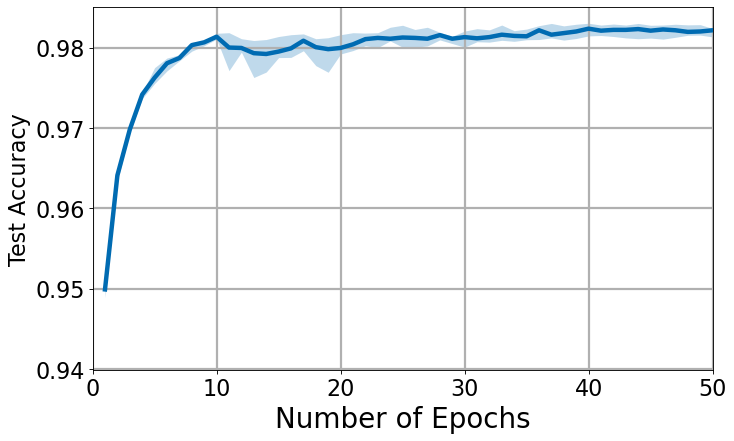

In [16]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# PC-Nudge

In [17]:
df_results = pd.read_pickle(r"../Results/simulation_results_PCNudge_MNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [18]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9395166666666667, 0.9529833333333333, 0.960...","[0.94, 0.9524, 0.9579, 0.9634, 0.9654, 0.9693,...",0.993933,0.9798
1,1,10,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9337333333333333, 0.9508, 0.959816666666666...","[0.9354, 0.9496, 0.9569, 0.9617, 0.9646, 0.965...",0.994283,0.9793
2,1,20,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.93615, 0.9497166666666667, 0.95818333333333...","[0.9348, 0.9475, 0.9561, 0.9603, 0.963, 0.9664...",0.993350,0.9790
3,1,30,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9359333333333333, 0.9512833333333334, 0.959...","[0.9368, 0.9502, 0.9558, 0.9603, 0.9646, 0.965...",0.993783,0.9768
4,1,40,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9369, 0.9532, 0.9599333333333333, 0.96515, ...","[0.9379, 0.9488, 0.956, 0.9609, 0.9641, 0.9683...",0.993383,0.9773
5,1,50,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9361333333333334, 0.95115, 0.95955, 0.96475...","[0.9373, 0.9502, 0.9568, 0.9603, 0.9637, 0.966...",0.994050,0.9764
6,1,60,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9370666666666667, 0.9523333333333334, 0.959...","[0.9364, 0.9518, 0.9564, 0.9601, 0.9642, 0.966...",0.993483,0.9776
7,1,70,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.93645, 0.9531, 0.9604, 0.9665333333333334, ...","[0.9348, 0.9498, 0.9566, 0.9613, 0.9646, 0.968...",0.994017,0.9780
8,1,80,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9357666666666666, 0.94975, 0.95755, 0.9633,...","[0.9344, 0.9472, 0.9525, 0.9577, 0.9623, 0.964...",0.993267,0.9768
9,1,90,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.9366166666666667, 0.9523666666666667, 0.959...","[0.9351, 0.9497, 0.9566, 0.9593, 0.9637, 0.965...",0.993667,0.9787


In [19]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.993722,0.97797
1,2,0.993768,0.97773


In [20]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

2.0

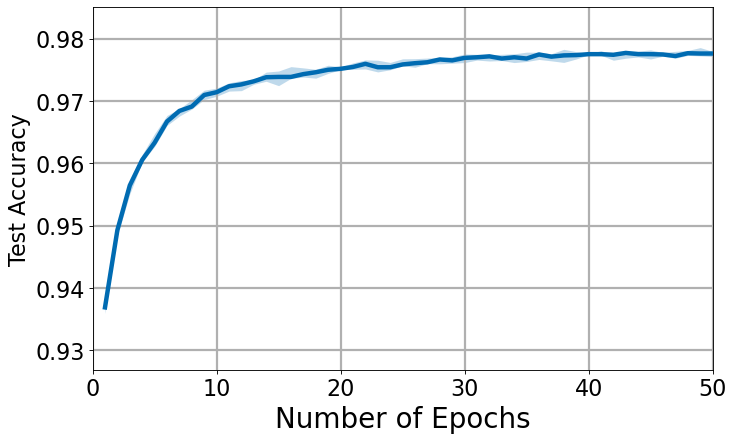

In [21]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# Altogether